In [1]:
train_path="D:\\train_tomato"

In [2]:
import os
train_labels = os.listdir(train_path)
print(train_labels)

['Tomato___Early_blight', 'Tomato___healthy']


In [3]:
train_labels.sort()

In [4]:
import numpy as np
import mahotas
import cv2
import os
import h5py

C:\Users\moham\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
# fixed-sizes for image
fixed_size = tuple((100, 100))
# path to training data
train_path = "D:\\train_tomato"
print("train_path\n",train_path)
# no.of.trees for Random Forests
num_trees = 100

# bins for histogram
bins = 8

# train_test_split size
test_size = 0.10

# seed for reproducing same results
seed = 9

def fd_hu_moments(image):  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
#     print('HISTOGRAM SHAPE',hist.shape)
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    

    return hist.flatten()
# get the training labels
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()
print(train_labels)



train_path
 D:\train_tomato
['Tomato___Early_blight', 'Tomato___healthy']


In [6]:
# empty lists to hold feature vectors and labels
global_features = []
labels = []

i, j = 0, 0
k = 0

In [7]:
for training_name in train_labels:
    # join the training data path and each species training folder
    img_list = os.listdir(train_path + '/' + training_name)

    current_label = training_name
    k = 1
    for img in img_list:
        image=train_path + '/' + training_name+'/' + img
        ip_img = cv2.imread(image)
        image = cv2.resize(ip_img, (100,100))
        
        ####################################
        # Global Feature extraction
        ####################################
        fv_hu_moments = fd_hu_moments(image)
        fv_haralick   = fd_haralick(image)
        fv_histogram  = fd_histogram(image)
###################################
        # Concatenate global features
        ###################################
# print('HARALICK SHAPE IS',fv_haralick.shape)
# print('HU_Moments_shape is',fv_hu_moments.shape)
# print('Histogram Shape  is',fv_histogram.shape)
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        print('GLOBAL_FEATURE',global_feature.shape)
        labels.append(current_label)
        global_features.append(global_feature)
        if k==1:
           print('GLOBAL FEATURE',global_feature)
           print('GLOBAL_FEATURES',global_features)
        i += 1
        k += 1
        print('k is',k)
    print( "[STATUS] processed folder: {}".format(current_label))
    print('GLOBAL FEATURE SHAPE',np.array(global_features).shape)
       
    j += 1
    

GLOBAL_FEATURE (532,)
GLOBAL FEATURE [ 1.53950334e-03  7.69751670e-04  3.46388249e-03  2.11681705e-02
  2.29001120e-01  6.96625233e-01  2.42086902e-01  3.84875835e-04
  6.15801336e-03  1.30857788e-02  2.23227981e-02  3.88724580e-02
  2.73261834e-02  2.30925507e-03  0.00000000e+00  0.00000000e+00
  7.69751659e-03  1.92437917e-02  2.69413088e-02  9.23702028e-03
  1.53950334e-03  3.84875835e-04  0.00000000e+00  0.00000000e+00
  9.23702028e-03  2.03984194e-02  2.23227981e-02  6.92776497e-03
  3.46388249e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.53950332e-02  2.00135428e-02  1.46252820e-02  1.11613991e-02
  3.46388249e-03  3.84875835e-04  0.00000000e+00  0.00000000e+00
  1.77042875e-02  3.34841982e-02  1.27009023e-02  1.03916479e-02
  1.92437915e-03  3.84875835e-04  0.00000000e+00  0.00000000e+00
  2.27076747e-02  4.11817133e-02  8.85214377e-03  5.00338571e-03
  1.15462753e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.84808110e-02  3.54085751e-02  3.07900668e-03  0.0

GLOBAL_FEATURE (532,)
k is 8
GLOBAL_FEATURE (532,)
k is 9
GLOBAL_FEATURE (532,)
k is 10
GLOBAL_FEATURE (532,)
k is 11
GLOBAL_FEATURE (532,)
k is 12
GLOBAL_FEATURE (532,)
k is 13
GLOBAL_FEATURE (532,)
k is 14
GLOBAL_FEATURE (532,)
k is 15
GLOBAL_FEATURE (532,)
k is 16
GLOBAL_FEATURE (532,)
k is 17
GLOBAL_FEATURE (532,)
k is 18
GLOBAL_FEATURE (532,)
k is 19
GLOBAL_FEATURE (532,)
k is 20
GLOBAL_FEATURE (532,)
k is 21
GLOBAL_FEATURE (532,)
k is 22
GLOBAL_FEATURE (532,)
k is 23
GLOBAL_FEATURE (532,)
k is 24
GLOBAL_FEATURE (532,)
k is 25
GLOBAL_FEATURE (532,)
k is 26
GLOBAL_FEATURE (532,)
k is 27
GLOBAL_FEATURE (532,)
k is 28
GLOBAL_FEATURE (532,)
k is 29
GLOBAL_FEATURE (532,)
k is 30
GLOBAL_FEATURE (532,)
k is 31
GLOBAL_FEATURE (532,)
k is 32
GLOBAL_FEATURE (532,)
k is 33
GLOBAL_FEATURE (532,)
k is 34
GLOBAL_FEATURE (532,)
k is 35
GLOBAL_FEATURE (532,)
k is 36
GLOBAL_FEATURE (532,)
k is 37
GLOBAL_FEATURE (532,)
k is 38
GLOBAL_FEATURE (532,)
k is 39
GLOBAL_FEATURE (532,)
k is 40
GLOBAL_FEATU

GLOBAL_FEATURE (532,)
k is 276
GLOBAL_FEATURE (532,)
k is 277
GLOBAL_FEATURE (532,)
k is 278
GLOBAL_FEATURE (532,)
k is 279
GLOBAL_FEATURE (532,)
k is 280
GLOBAL_FEATURE (532,)
k is 281
GLOBAL_FEATURE (532,)
k is 282
GLOBAL_FEATURE (532,)
k is 283
GLOBAL_FEATURE (532,)
k is 284
GLOBAL_FEATURE (532,)
k is 285
GLOBAL_FEATURE (532,)
k is 286
GLOBAL_FEATURE (532,)
k is 287
GLOBAL_FEATURE (532,)
k is 288
GLOBAL_FEATURE (532,)
k is 289
GLOBAL_FEATURE (532,)
k is 290
GLOBAL_FEATURE (532,)
k is 291
GLOBAL_FEATURE (532,)
k is 292
GLOBAL_FEATURE (532,)
k is 293
GLOBAL_FEATURE (532,)
k is 294
GLOBAL_FEATURE (532,)
k is 295
GLOBAL_FEATURE (532,)
k is 296
GLOBAL_FEATURE (532,)
k is 297
GLOBAL_FEATURE (532,)
k is 298
GLOBAL_FEATURE (532,)
k is 299
GLOBAL_FEATURE (532,)
k is 300
GLOBAL_FEATURE (532,)
k is 301
GLOBAL_FEATURE (532,)
k is 302
GLOBAL_FEATURE (532,)
k is 303
GLOBAL_FEATURE (532,)
k is 304
GLOBAL_FEATURE (532,)
k is 305
GLOBAL_FEATURE (532,)
k is 306
GLOBAL_FEATURE (532,)
k is 307
GLOBAL_F

GLOBAL_FEATURE (532,)
k is 548
GLOBAL_FEATURE (532,)
k is 549
GLOBAL_FEATURE (532,)
k is 550
GLOBAL_FEATURE (532,)
k is 551
GLOBAL_FEATURE (532,)
k is 552
GLOBAL_FEATURE (532,)
k is 553
GLOBAL_FEATURE (532,)
k is 554
GLOBAL_FEATURE (532,)
k is 555
GLOBAL_FEATURE (532,)
k is 556
GLOBAL_FEATURE (532,)
k is 557
GLOBAL_FEATURE (532,)
k is 558
GLOBAL_FEATURE (532,)
k is 559
GLOBAL_FEATURE (532,)
k is 560
GLOBAL_FEATURE (532,)
k is 561
GLOBAL_FEATURE (532,)
k is 562
GLOBAL_FEATURE (532,)
k is 563
GLOBAL_FEATURE (532,)
k is 564
GLOBAL_FEATURE (532,)
k is 565
GLOBAL_FEATURE (532,)
k is 566
GLOBAL_FEATURE (532,)
k is 567
GLOBAL_FEATURE (532,)
k is 568
GLOBAL_FEATURE (532,)
k is 569
GLOBAL_FEATURE (532,)
k is 570
GLOBAL_FEATURE (532,)
k is 571
GLOBAL_FEATURE (532,)
k is 572
GLOBAL_FEATURE (532,)
k is 573
GLOBAL_FEATURE (532,)
k is 574
GLOBAL_FEATURE (532,)
k is 575
GLOBAL_FEATURE (532,)
k is 576
GLOBAL_FEATURE (532,)
k is 577
GLOBAL_FEATURE (532,)
k is 578
GLOBAL_FEATURE (532,)
k is 579
GLOBAL_F

GLOBAL_FEATURE (532,)
k is 815
GLOBAL_FEATURE (532,)
k is 816
GLOBAL_FEATURE (532,)
k is 817
GLOBAL_FEATURE (532,)
k is 818
GLOBAL_FEATURE (532,)
k is 819
GLOBAL_FEATURE (532,)
k is 820
GLOBAL_FEATURE (532,)
k is 821
GLOBAL_FEATURE (532,)
k is 822
GLOBAL_FEATURE (532,)
k is 823
GLOBAL_FEATURE (532,)
k is 824
GLOBAL_FEATURE (532,)
k is 825
GLOBAL_FEATURE (532,)
k is 826
GLOBAL_FEATURE (532,)
k is 827
GLOBAL_FEATURE (532,)
k is 828
GLOBAL_FEATURE (532,)
k is 829
GLOBAL_FEATURE (532,)
k is 830
GLOBAL_FEATURE (532,)
k is 831
GLOBAL_FEATURE (532,)
k is 832
GLOBAL_FEATURE (532,)
k is 833
GLOBAL_FEATURE (532,)
k is 834
GLOBAL_FEATURE (532,)
k is 835
GLOBAL_FEATURE (532,)
k is 836
GLOBAL_FEATURE (532,)
k is 837
GLOBAL_FEATURE (532,)
k is 838
GLOBAL_FEATURE (532,)
k is 839
GLOBAL_FEATURE (532,)
k is 840
GLOBAL_FEATURE (532,)
k is 841
GLOBAL_FEATURE (532,)
k is 842
GLOBAL_FEATURE (532,)
k is 843
GLOBAL_FEATURE (532,)
k is 844
GLOBAL_FEATURE (532,)
k is 845
GLOBAL_FEATURE (532,)
k is 846
GLOBAL_F

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



GLOBAL_FEATURE (532,)
k is 3
GLOBAL_FEATURE (532,)
k is 4
GLOBAL_FEATURE (532,)
k is 5
GLOBAL_FEATURE (532,)
k is 6
GLOBAL_FEATURE (532,)
k is 7
GLOBAL_FEATURE (532,)
k is 8
GLOBAL_FEATURE (532,)
k is 9
GLOBAL_FEATURE (532,)
k is 10
GLOBAL_FEATURE (532,)
k is 11
GLOBAL_FEATURE (532,)
k is 12
GLOBAL_FEATURE (532,)
k is 13
GLOBAL_FEATURE (532,)
k is 14
GLOBAL_FEATURE (532,)
k is 15
GLOBAL_FEATURE (532,)
k is 16
GLOBAL_FEATURE (532,)
k is 17
GLOBAL_FEATURE (532,)
k is 18
GLOBAL_FEATURE (532,)
k is 19
GLOBAL_FEATURE (532,)
k is 20
GLOBAL_FEATURE (532,)
k is 21
GLOBAL_FEATURE (532,)
k is 22
GLOBAL_FEATURE (532,)
k is 23
GLOBAL_FEATURE (532,)
k is 24
GLOBAL_FEATURE (532,)
k is 25
GLOBAL_FEATURE (532,)
k is 26
GLOBAL_FEATURE (532,)
k is 27
GLOBAL_FEATURE (532,)
k is 28
GLOBAL_FEATURE (532,)
k is 29
GLOBAL_FEATURE (532,)
k is 30
GLOBAL_FEATURE (532,)
k is 31
GLOBAL_FEATURE (532,)
k is 32
GLOBAL_FEATURE (532,)
k is 33
GLOBAL_FEATURE (532,)
k is 34
GLOBAL_FEATURE (532,)
k is 35
GLOBAL_FEATURE (5

GLOBAL_FEATURE (532,)
k is 276
GLOBAL_FEATURE (532,)
k is 277
GLOBAL_FEATURE (532,)
k is 278
GLOBAL_FEATURE (532,)
k is 279
GLOBAL_FEATURE (532,)
k is 280
GLOBAL_FEATURE (532,)
k is 281
GLOBAL_FEATURE (532,)
k is 282
GLOBAL_FEATURE (532,)
k is 283
GLOBAL_FEATURE (532,)
k is 284
GLOBAL_FEATURE (532,)
k is 285
GLOBAL_FEATURE (532,)
k is 286
GLOBAL_FEATURE (532,)
k is 287
GLOBAL_FEATURE (532,)
k is 288
GLOBAL_FEATURE (532,)
k is 289
GLOBAL_FEATURE (532,)
k is 290
GLOBAL_FEATURE (532,)
k is 291
GLOBAL_FEATURE (532,)
k is 292
GLOBAL_FEATURE (532,)
k is 293
GLOBAL_FEATURE (532,)
k is 294
GLOBAL_FEATURE (532,)
k is 295
GLOBAL_FEATURE (532,)
k is 296
GLOBAL_FEATURE (532,)
k is 297
GLOBAL_FEATURE (532,)
k is 298
GLOBAL_FEATURE (532,)
k is 299
GLOBAL_FEATURE (532,)
k is 300
GLOBAL_FEATURE (532,)
k is 301
GLOBAL_FEATURE (532,)
k is 302
GLOBAL_FEATURE (532,)
k is 303
GLOBAL_FEATURE (532,)
k is 304
GLOBAL_FEATURE (532,)
k is 305
GLOBAL_FEATURE (532,)
k is 306
GLOBAL_FEATURE (532,)
k is 307
GLOBAL_F

GLOBAL_FEATURE (532,)
k is 544
GLOBAL_FEATURE (532,)
k is 545
GLOBAL_FEATURE (532,)
k is 546
GLOBAL_FEATURE (532,)
k is 547
GLOBAL_FEATURE (532,)
k is 548
GLOBAL_FEATURE (532,)
k is 549
GLOBAL_FEATURE (532,)
k is 550
GLOBAL_FEATURE (532,)
k is 551
GLOBAL_FEATURE (532,)
k is 552
GLOBAL_FEATURE (532,)
k is 553
GLOBAL_FEATURE (532,)
k is 554
GLOBAL_FEATURE (532,)
k is 555
GLOBAL_FEATURE (532,)
k is 556
GLOBAL_FEATURE (532,)
k is 557
GLOBAL_FEATURE (532,)
k is 558
GLOBAL_FEATURE (532,)
k is 559
GLOBAL_FEATURE (532,)
k is 560
GLOBAL_FEATURE (532,)
k is 561
GLOBAL_FEATURE (532,)
k is 562
GLOBAL_FEATURE (532,)
k is 563
GLOBAL_FEATURE (532,)
k is 564
GLOBAL_FEATURE (532,)
k is 565
GLOBAL_FEATURE (532,)
k is 566
GLOBAL_FEATURE (532,)
k is 567
GLOBAL_FEATURE (532,)
k is 568
GLOBAL_FEATURE (532,)
k is 569
GLOBAL_FEATURE (532,)
k is 570
GLOBAL_FEATURE (532,)
k is 571
GLOBAL_FEATURE (532,)
k is 572
GLOBAL_FEATURE (532,)
k is 573
GLOBAL_FEATURE (532,)
k is 574
GLOBAL_FEATURE (532,)
k is 575
GLOBAL_F

GLOBAL_FEATURE (532,)
k is 813
GLOBAL_FEATURE (532,)
k is 814
GLOBAL_FEATURE (532,)
k is 815
GLOBAL_FEATURE (532,)
k is 816
GLOBAL_FEATURE (532,)
k is 817
GLOBAL_FEATURE (532,)
k is 818
GLOBAL_FEATURE (532,)
k is 819
GLOBAL_FEATURE (532,)
k is 820
GLOBAL_FEATURE (532,)
k is 821
GLOBAL_FEATURE (532,)
k is 822
GLOBAL_FEATURE (532,)
k is 823
GLOBAL_FEATURE (532,)
k is 824
GLOBAL_FEATURE (532,)
k is 825
GLOBAL_FEATURE (532,)
k is 826
GLOBAL_FEATURE (532,)
k is 827
GLOBAL_FEATURE (532,)
k is 828
GLOBAL_FEATURE (532,)
k is 829
GLOBAL_FEATURE (532,)
k is 830
GLOBAL_FEATURE (532,)
k is 831
GLOBAL_FEATURE (532,)
k is 832
GLOBAL_FEATURE (532,)
k is 833
GLOBAL_FEATURE (532,)
k is 834
GLOBAL_FEATURE (532,)
k is 835
GLOBAL_FEATURE (532,)
k is 836
GLOBAL_FEATURE (532,)
k is 837
GLOBAL_FEATURE (532,)
k is 838
GLOBAL_FEATURE (532,)
k is 839
GLOBAL_FEATURE (532,)
k is 840
GLOBAL_FEATURE (532,)
k is 841
GLOBAL_FEATURE (532,)
k is 842
GLOBAL_FEATURE (532,)
k is 843
GLOBAL_FEATURE (532,)
k is 844
GLOBAL_F

GLOBAL_FEATURE (532,)
k is 1077
GLOBAL_FEATURE (532,)
k is 1078
GLOBAL_FEATURE (532,)
k is 1079
GLOBAL_FEATURE (532,)
k is 1080
GLOBAL_FEATURE (532,)
k is 1081
GLOBAL_FEATURE (532,)
k is 1082
GLOBAL_FEATURE (532,)
k is 1083
GLOBAL_FEATURE (532,)
k is 1084
GLOBAL_FEATURE (532,)
k is 1085
GLOBAL_FEATURE (532,)
k is 1086
GLOBAL_FEATURE (532,)
k is 1087
GLOBAL_FEATURE (532,)
k is 1088
GLOBAL_FEATURE (532,)
k is 1089
GLOBAL_FEATURE (532,)
k is 1090
GLOBAL_FEATURE (532,)
k is 1091
GLOBAL_FEATURE (532,)
k is 1092
GLOBAL_FEATURE (532,)
k is 1093
GLOBAL_FEATURE (532,)
k is 1094
GLOBAL_FEATURE (532,)
k is 1095
GLOBAL_FEATURE (532,)
k is 1096
GLOBAL_FEATURE (532,)
k is 1097
GLOBAL_FEATURE (532,)
k is 1098
GLOBAL_FEATURE (532,)
k is 1099
GLOBAL_FEATURE (532,)
k is 1100
GLOBAL_FEATURE (532,)
k is 1101
GLOBAL_FEATURE (532,)
k is 1102
GLOBAL_FEATURE (532,)
k is 1103
GLOBAL_FEATURE (532,)
k is 1104
GLOBAL_FEATURE (532,)
k is 1105
GLOBAL_FEATURE (532,)
k is 1106
GLOBAL_FEATURE (532,)
k is 1107
GLOBAL_F

GLOBAL_FEATURE (532,)
k is 1335
GLOBAL_FEATURE (532,)
k is 1336
GLOBAL_FEATURE (532,)
k is 1337
GLOBAL_FEATURE (532,)
k is 1338
GLOBAL_FEATURE (532,)
k is 1339
GLOBAL_FEATURE (532,)
k is 1340
GLOBAL_FEATURE (532,)
k is 1341
GLOBAL_FEATURE (532,)
k is 1342
GLOBAL_FEATURE (532,)
k is 1343
GLOBAL_FEATURE (532,)
k is 1344
GLOBAL_FEATURE (532,)
k is 1345
GLOBAL_FEATURE (532,)
k is 1346
GLOBAL_FEATURE (532,)
k is 1347
GLOBAL_FEATURE (532,)
k is 1348
GLOBAL_FEATURE (532,)
k is 1349
GLOBAL_FEATURE (532,)
k is 1350
GLOBAL_FEATURE (532,)
k is 1351
GLOBAL_FEATURE (532,)
k is 1352
GLOBAL_FEATURE (532,)
k is 1353
GLOBAL_FEATURE (532,)
k is 1354
GLOBAL_FEATURE (532,)
k is 1355
GLOBAL_FEATURE (532,)
k is 1356
GLOBAL_FEATURE (532,)
k is 1357
GLOBAL_FEATURE (532,)
k is 1358
GLOBAL_FEATURE (532,)
k is 1359
GLOBAL_FEATURE (532,)
k is 1360
GLOBAL_FEATURE (532,)
k is 1361
GLOBAL_FEATURE (532,)
k is 1362
GLOBAL_FEATURE (532,)
k is 1363
GLOBAL_FEATURE (532,)
k is 1364
GLOBAL_FEATURE (532,)
k is 1365
GLOBAL_F

In [8]:
print ("[STATUS] completed Global Feature Extraction...")
# get the overall feature vector size
print ("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print ("[STATUS] training Labels {}".format(np.array(labels).shape))

[STATUS] completed Global Feature Extraction...
[STATUS] feature vector size (2525, 532)
[STATUS] training Labels (2525,)


In [9]:
# encode the target labels
targetNames = np.unique(labels)
print(targetNames)

['Tomato___Early_blight' 'Tomato___healthy']


In [10]:
# organize imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# # encode the target labels
# targetNames = np.unique(labels)
# print(labels)
le = LabelEncoder()
print('Label',le)
target = le.fit_transform(labels)
print(target)
print ("[STATUS] training labels encoded...",np.array(labels).shape)

# normalize the feature vector in the range (0-1)

Label LabelEncoder()
[0 0 0 ... 1 1 1]
[STATUS] training labels encoded... (2525,)


In [11]:

scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
rescaled_features.shape

(2525, 532)

In [12]:
print ("[STATUS] feature vector normalized...")

print ("[STATUS] target labels: {}".format(target))
print ("[STATUS] target labels shape: {}".format(target.shape))

[STATUS] feature vector normalized...
[STATUS] target labels: [0 0 0 ... 1 1 1]
[STATUS] target labels shape: (2525,)


In [13]:


scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print(rescaled_features.shape)

(2525, 532)


In [14]:
# save the feature vector using HDF5
h5f_data = h5py.File('D:/output/data.h5', 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File('D:/output/labels.h5', 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

print ("[STATUS] end of training..")

[STATUS] end of training..


In [15]:
# import the necessary packages
import h5py
import numpy as np
import os
import glob
import cv2
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

In [16]:
models = []
models.append(('SVM', SVC(random_state=9)))

# variables to hold the results and names
results = []
names = []
scoring = "accuracy"

# import the feature vector and trained labels
h5f_data = h5py.File('D:/output/data.h5', 'r')
h5f_label = h5py.File('D:/output/labels.h5', 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print ("[STATUS] features shape: {}".format(global_features.shape))
print ("[STATUS] labels shape: {}".format(global_labels.shape))

print ("[STATUS] training started...")

[STATUS] features shape: (2525, 532)
[STATUS] labels shape: (2525,)
[STATUS] training started...


In [17]:
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print ("[STATUS] splitted train and test data...")
print ("Train data  : {}".format(trainDataGlobal.shape))
print ("Test data   : {}".format(testDataGlobal.shape))
print ("Train labels: {}".format(trainLabelsGlobal.shape))
print ("Test labels : {}".format(testLabelsGlobal.shape))

[STATUS] splitted train and test data...
Train data  : (2272, 532)
Test data   : (253, 532)
Train labels: (2272,)
Test labels : (253,)


In [18]:
import glob
import cv2
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

# create all the machine learning models
models = []

In [19]:
models.append(('SVM', SVC(random_state=9)))

# variables to hold the results and names
results = []
names = []
scoring = "accuracy"

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


SVM: 0.991632 (0.007490)


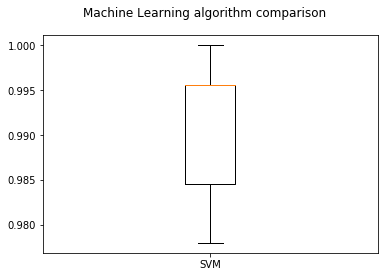

In [22]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [23]:
import matplotlib.pyplot as plt

# create the model - Random Forests
clf  = SVC(random_state=9)

# fit the training data to the model
clf.fit(trainDataGlobal, trainLabelsGlobal)

# path to test data

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=9, shrinking=True,
  tol=0.001, verbose=False)

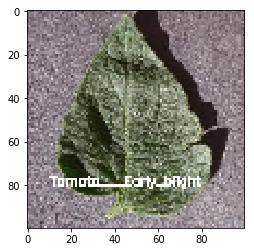

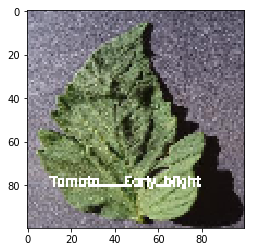

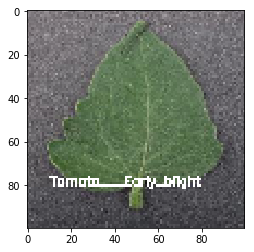

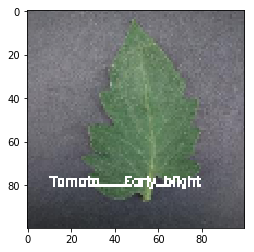

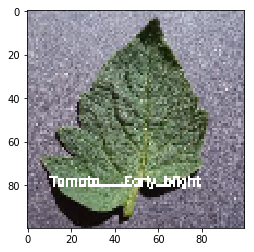

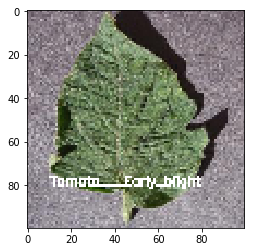

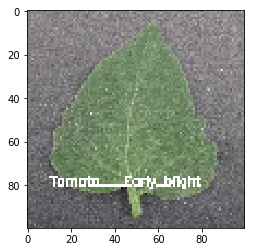

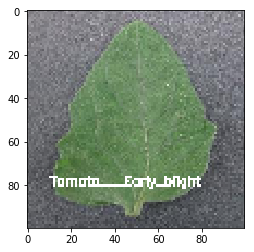

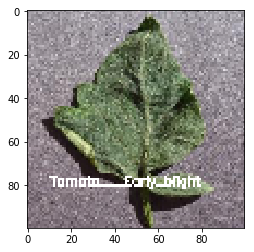

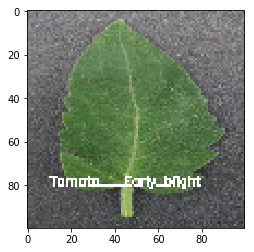

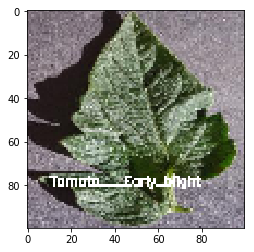

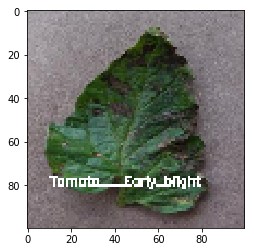

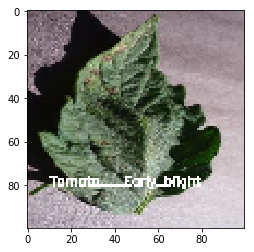

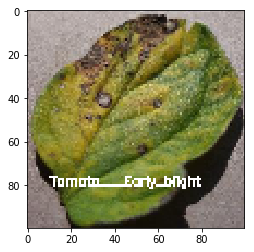

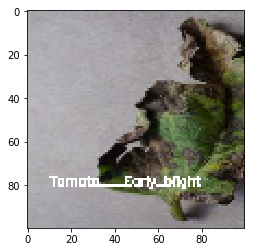

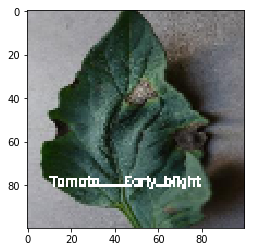

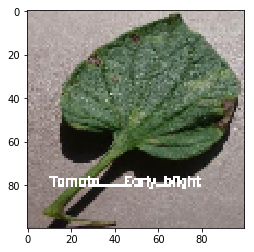

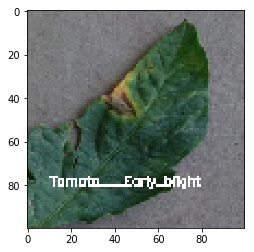

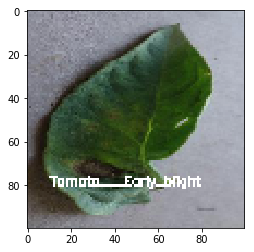

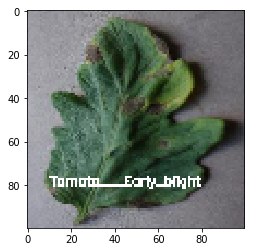

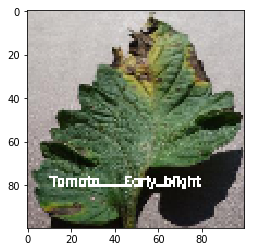

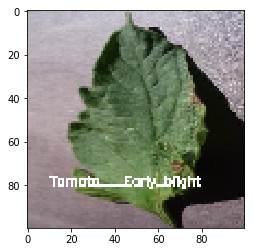

In [38]:
test_path = "D:\\test_tomato"

for file in glob.glob(test_path + "/*.jpg"):
    # read the image

    ip_img = cv2.imread(file)
    image = cv2.resize(ip_img, (100,100))

    ####################################
    # Global Feature extraction
    ####################################
    fv_hu_moments = fd_hu_moments(image)
    fv_haralick   = fd_haralick(image)
    fv_histogram  = fd_histogram(image)

    ###################################
    # Concatenate global features
    ###################################
    global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

    # predict label of test image
    prediction = clf.predict(global_feature.reshape(1,-1))[0]

    # show predicted label on image
    cv2.putText(image, train_labels[prediction], (10,80), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255,255,255), 1)

    # display the output image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()